In [1]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
from scipy.stats.stats import pearsonr

In [2]:
def kernel(point,xmat, k):
    m,n = np1.shape(xmat)
    weights = np1.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat)
    ypred = np1.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

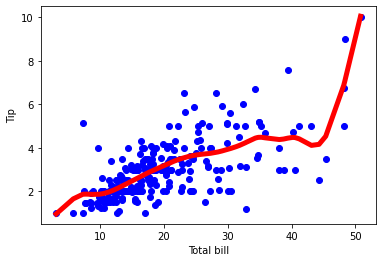

In [3]:
data = pd.read_csv('tips.csv')
bill = np1.array(data.total_bill)
tip = np1.array(data.tip)

mbill = np1.mat(bill)
mtip = np1.mat(tip) # mat is used to convert to n dimesiona to 2 dimensional array form
m= np1.shape(mbill)[1]

one = np1.mat(np1.ones(m))
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE

ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

In [4]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

def local_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0] 
    X = np.c_[np.ones(len(X)), X]
   
    xw = X.T * radial_kernel(x0, X, tau) 
    beta = np.linalg.pinv(xw @ X) @ xw @ Y 
    return x0 @ beta 

def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))


n = 1000
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])
domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])

def plot_lwr(tau):

    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot


show(gridplot([
[plot_lwr(10.), plot_lwr(1.)],
[plot_lwr(0.1), plot_lwr(0.01)]]))

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.06632253 -2.88396692 -3.01393338 -3.04049219 -3.08735047 -2.96371511
 -3.14350869 -3.01310796 -3.07553247]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]
